In [112]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [113]:
#reading the data from the disk into memory
titanic_data = pd.read_csv("train.csv")

In [114]:
# Listing the column headers from the data file:
titanic_data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [115]:
# I will look at Pclass, Sex, Age, SibSp: create a separate dataframe to store these variables:
X = pd.DataFrame()
X['pclass'] = titanic_data['Pclass']
X['sex'] = titanic_data['Sex']
X['age'] = titanic_data['Age']
X['sibsp'] = titanic_data['SibSp']
X['survived'] = titanic_data['Survived']

In [116]:
# As a starting strategy, I'll drop missing values (included in Age) so our linear scaling works nicely:
X = X.dropna(axis=0)

In [117]:
# The dependent variable with be 'survived' so we'll assign it to y:
y = X['survived']
X = X.drop(['survived'], axis=1)

In [118]:
# Pclass and Sex are both categorical variables. Since Sex is a string, I'll use one hot encoding to covert it
# to a binary value:
pd.get_dummies(X.sex)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0


In [119]:
# Now, we need to drop one of these two categories, so we'll re-assign Sex to female = 1, male = 0:
X['sex'] = pd.get_dummies(X.sex)['female']

In [120]:
pd.get_dummies(X.pclass)

,1,2,3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0
10,0.0,0.0,1.0


In [99]:
# Now, we need to drop two of these three categories, so we'll re-assign Pclass to Class 3 = 1, Class 1 or 2 = 0:
#X['pclass'] = pd.get_dummies(X.pclass)[3]

In [121]:
pd.get_dummies(X.sibsp)

,0,1,2,3,4,5
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
# Now, we need to drop four of these five categories, so we'll re-assign SibSp to 0 = 1, 1,2,3,4,5 = 0:
#X['sibsp'] = pd.get_dummies(X.sibsp)[0]

In [122]:
# Just looking at the data...
X

,pclass,sex,age,sibsp
0,3,0.0,22.0,1
1,1,1.0,38.0,1
2,3,1.0,26.0,0
3,1,1.0,35.0,1
4,3,0.0,35.0,0
6,1,0.0,54.0,0
7,3,0.0,2.0,3
8,3,1.0,27.0,0
9,2,1.0,14.0,1
10,3,1.0,4.0,1


In [123]:
# Load in sklearn and scale our featyres:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [124]:
# Now, build the TEST and TRAINING data sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Setup a Base Rate Model for comparison where there are no survivors:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y


In [126]:
# Checking the accuracy of the base rate model:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracyu is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracyu is 0.61


In [127]:
# Now, see how the Logisitc Regression can do with this data set:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)

In [128]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test))

Logistic accuracy is 0.76


In [130]:
# Compare the model with Area Under the Curve:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [131]:
print " ~~~ BASE MODEL ~~~"
# base rate AUC:
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print "Base Rate AUC = %2.2f" % base_roc_auc
print classification_report(y_test, base_rate_model(X_test))
print "\n\n~~~ LOGISTIC MODEL ~~~"
# logistic AUC:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test))

 ~~~ BASE MODEL ~~~
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.61      1.00      0.76        87
          1       0.00      0.00      0.00        56

avg / total       0.37      0.61      0.46       143



~~~ LOGISTIC MODEL ~~~
Logistic AUC = 0.74
             precision    recall  f1-score   support

          0       0.79      0.82      0.80        87
          1       0.70      0.66      0.68        56

avg / total       0.75      0.76      0.75       143



In [132]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

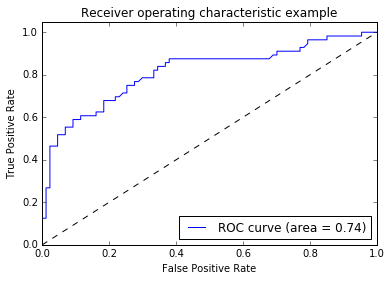

In [133]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()